# Momento de retroalimentación - Construcción de un modelo estadístico base

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:

*   Qué variables son significativas para predecir el precio de un automóvil.
*   Qué tan bien describen esas variables el precio de un automóvil.

Con base en varias encuestas de mercado, la consultora ha recopilado un gran conjunto de datos de diferentes tipos de automóviles en el mercado estadounidense que presenta en el siguiente archivo Download archivo. Las variables recopiladas vienen descritas en el diccionario de términos Download diccionario de términos.

## Análisis

### Exploración y preparación de la base de datos

Importar las librerías necesarias

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Importar la base de datos de Drive

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd  # show current path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1FNDCkfZgBaoLUenHQpb6h3yPrqX4y7SU/AI


In [ ]:
%cd "/content/gdrive/MyDrive/AI"
!ls  # show current directory

/content/gdrive/.shortcut-targets-by-id/1FNDCkfZgBaoLUenHQpb6h3yPrqX4y7SU/AI
data_titanic.csv	 precios_autos.csv     test.csv    titanic_prueba.ipynb
Diagrama_Modelos.drawio  precios_autos.gsheet  tested.csv


In [ ]:
data_base = pd.read_csv("precios_autos.csv")

**Metadata del dataset**

| Variable | Definición | Clave |
|--------------|--------------|--------------|
| Symboling    | Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.    |   |
| CarName    | Name of car company (Categorical) |   |
| fueltype    | Car fuel type i.e gas or diesel (Categorical)  |     |
| carbody    | body of car (Categorical)  |     |
| drivewheel    | type of drive wheel (Categorical)  |    |
| enginelocation    | Location of car engine (Categorical) |     |
| wheelbase    |Weelbase of car (Numeric)  |     |
| carlength    | Length of car (Numeric) |     |
| carwidth    | Width of car (Numeric) |     |
| carheight    | height of car (Numeric) |  |
| curbweight    | The weight of a car without occupants or baggage. (Numeric)  |     |
| enginetype    | Type of engine. (Categorical) |     |
| cylindernumber    | cylinder placed in the car (Categorical)  |     |
| enginesize    | Size of car (Numeric)  |     |
| stroke    | Stroke or volume inside the engine (Numeric)  |     |
| compressionratio    | compression ratio of car (Numeric)  |     |
| horsepower    | Horsepower (Numeric)  |     |
| peakrpm    | car peak rpm (Numeric)  |     |
| citympg    | Mileage in city (Numeric) |     |
| highwaympg    | Mileage on highway (Numeric) |     |
| price(Dependent variable)    | Price of car (Numeric) |     |


In [ ]:
data_base.head() # Head

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Además cambié el nombre erroneo de ciertos autos para que coincidan con la marca
for i in range(len(data_base)):
    for j in range(len(data_base['CarName'][i])):
        if data_base['CarName'][i][j] == ' ':
            data_base['CarName'][i] = data_base['CarName'][i][:j]
            break
    #replace names
    if data_base['CarName'][i] == 'maxda':
        data_base['CarName'][i].replace('mazda')
    elif data_base['CarName'][i] == 'porcshce':
        data_base['CarName'][i] = 'porsche'
    elif data_base['CarName'][i] == 'toyouta':
        data_base['CarName'][i] = 'toyota'
    elif data_base['CarName'][i] == 'vw':
        data_base['CarName'][i] = 'volkswagen'
    elif data_base['CarName'][i] == 'vokswagen':
        data_base['CarName'][i] = 'volkswagen'
    elif data_base['CarName'][i] == 'Nissan':
        data_base['CarName'][i] = 'nissan'

Separamos las variables cuantitativas de las cualitativas para realizar un estudio de las métricas

In [ ]:
cual_var = ['symboling','CarName','fueltype','carbody','drivewheel','enginelocation','enginetype','cylindernumber']
caunt_var = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
df_cuantitativo = data_base[caunt_var]
df_cualitatitvo = data_base[cual_var]

Variables cuantitativas

In [ ]:
df_cuantitativo.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [ ]:
for columns in caunt_var:
  plt.hist(data_base[columns])
  plt.title(columns)
  plt.xlabel(columns)
  plt.ylabel("Frecuencia")
  plt.show()

Variables categóricas

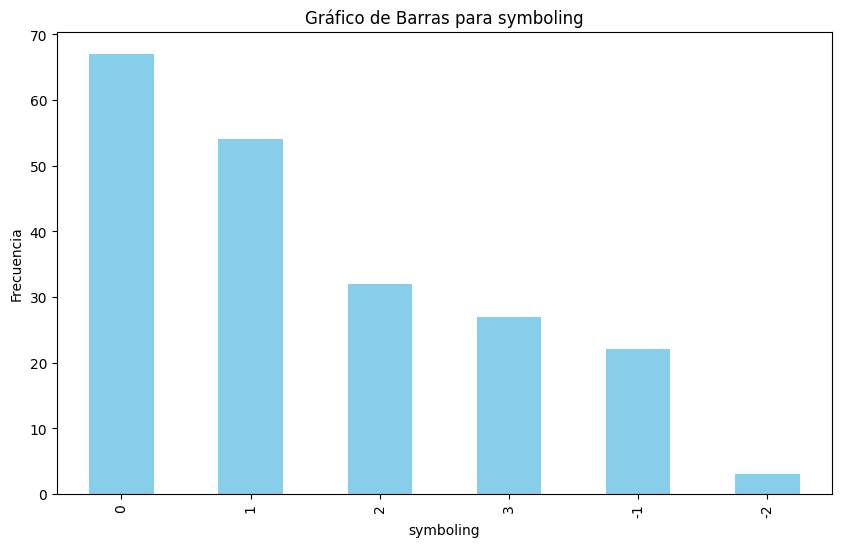

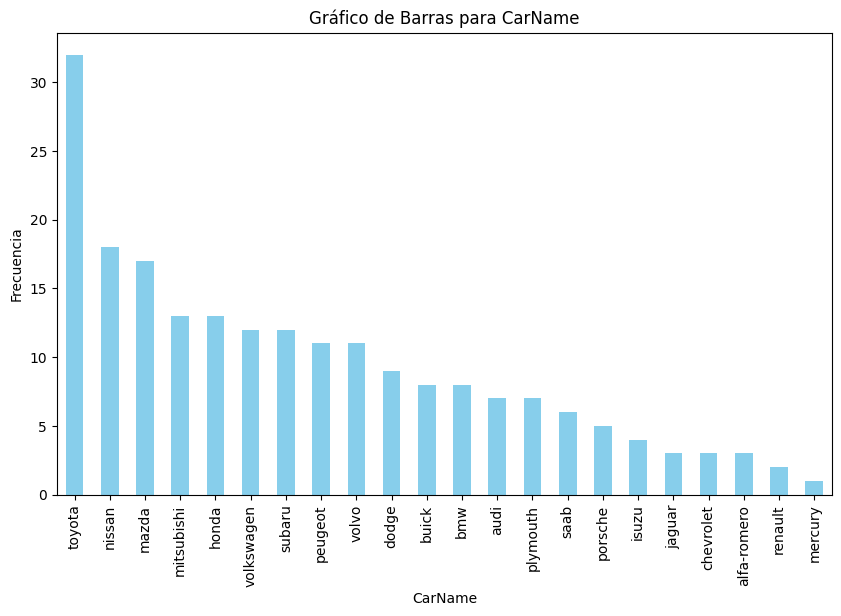

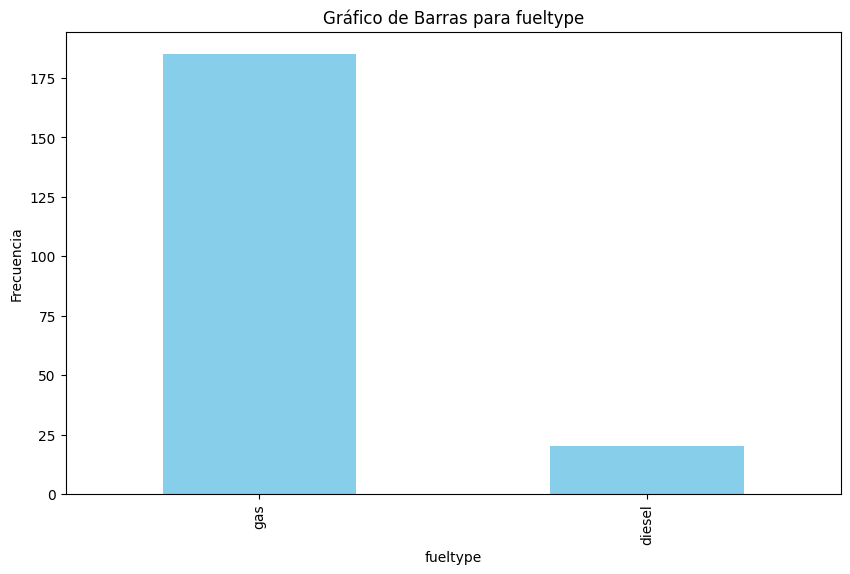

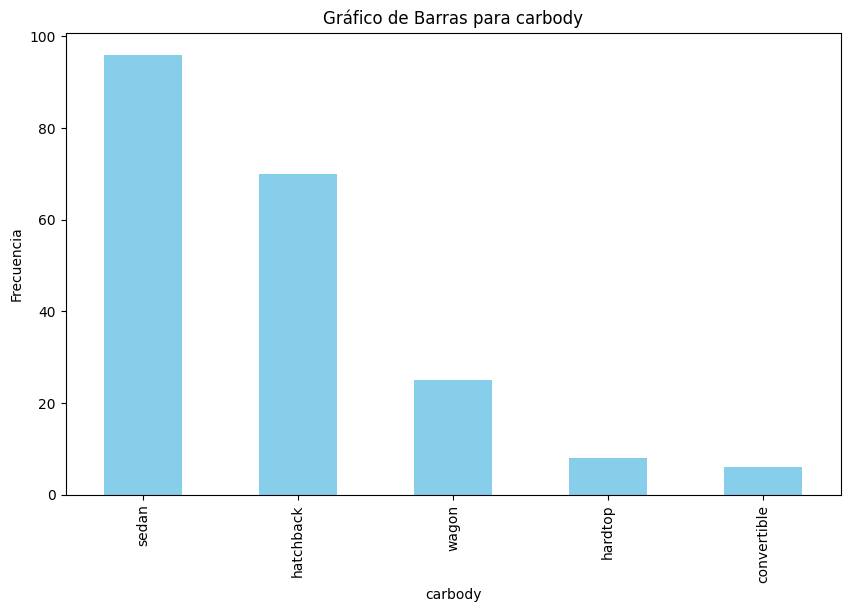

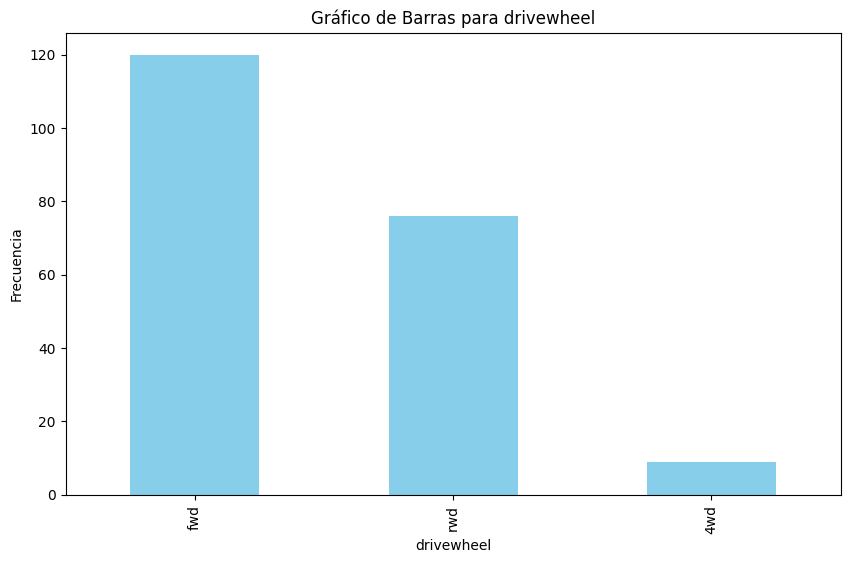

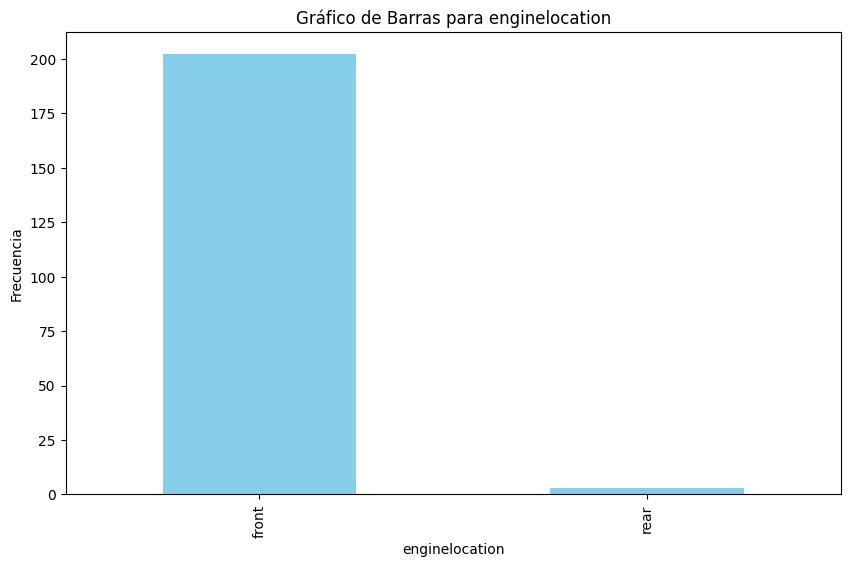

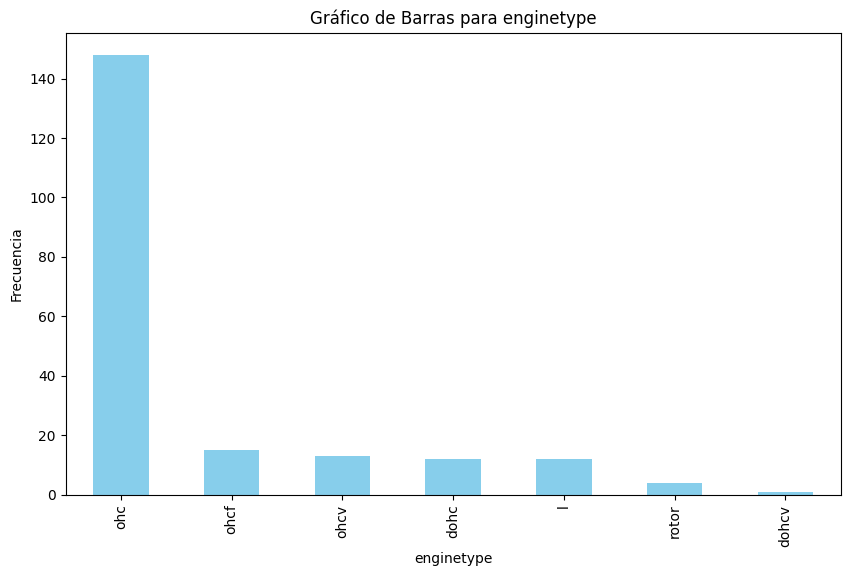

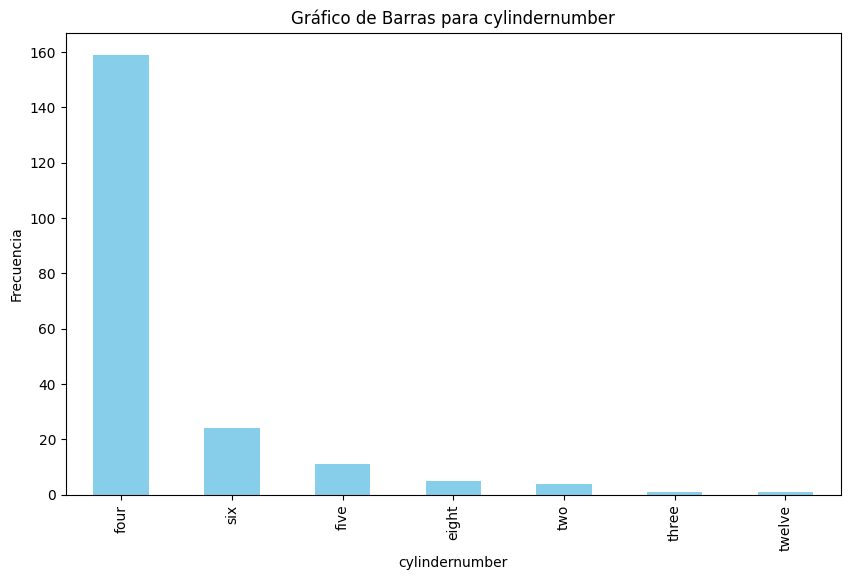

In [ ]:
for column in cual_var:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus necesidades
    data_base[column].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Gráfico de Barras para {column}')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.show()


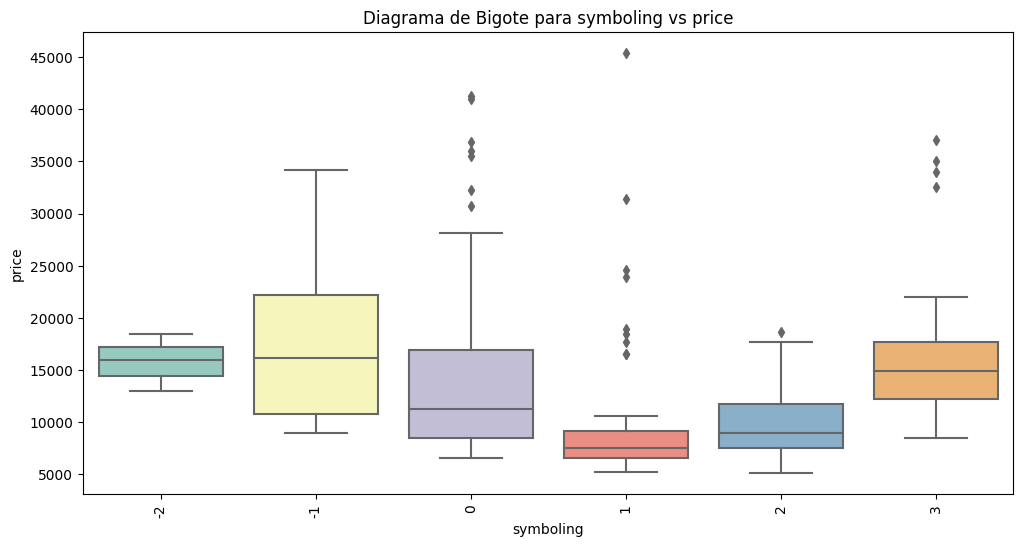

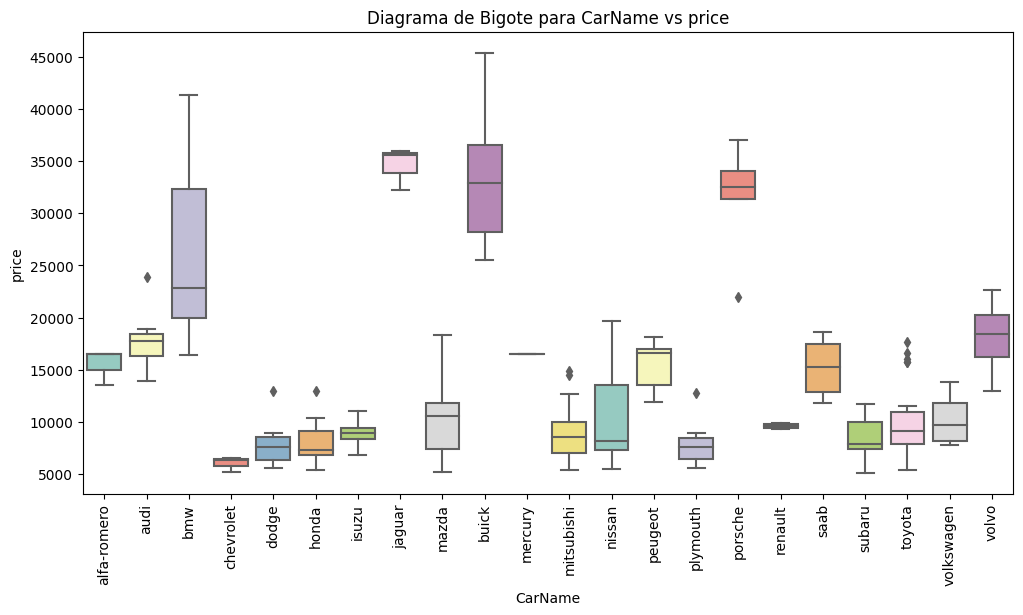

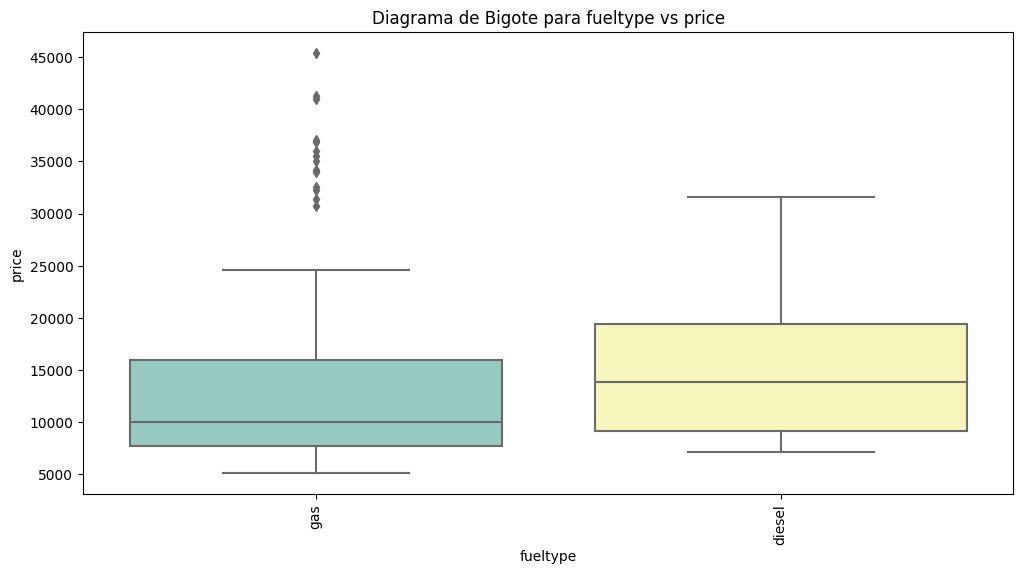

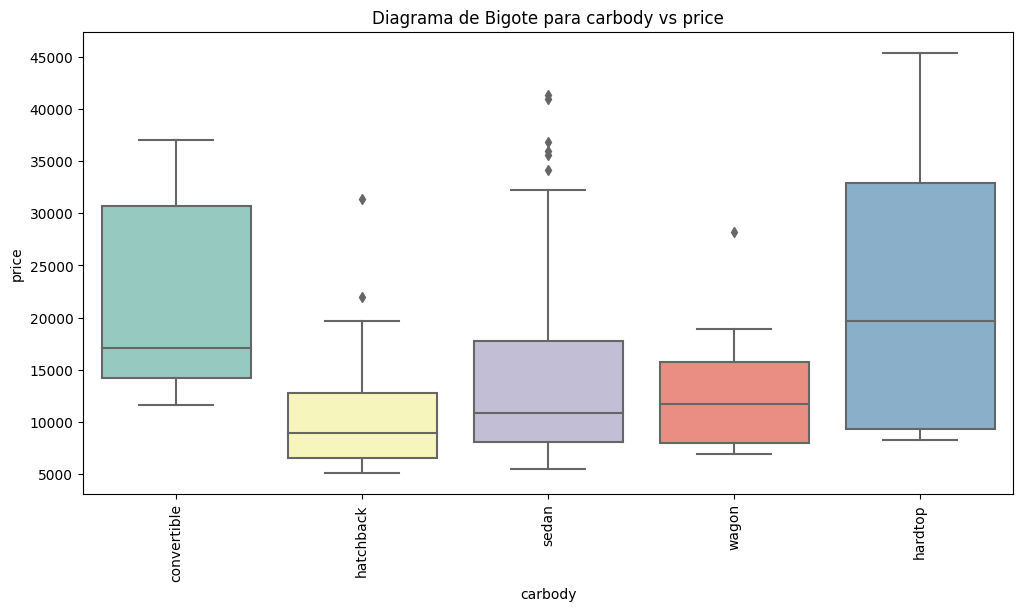

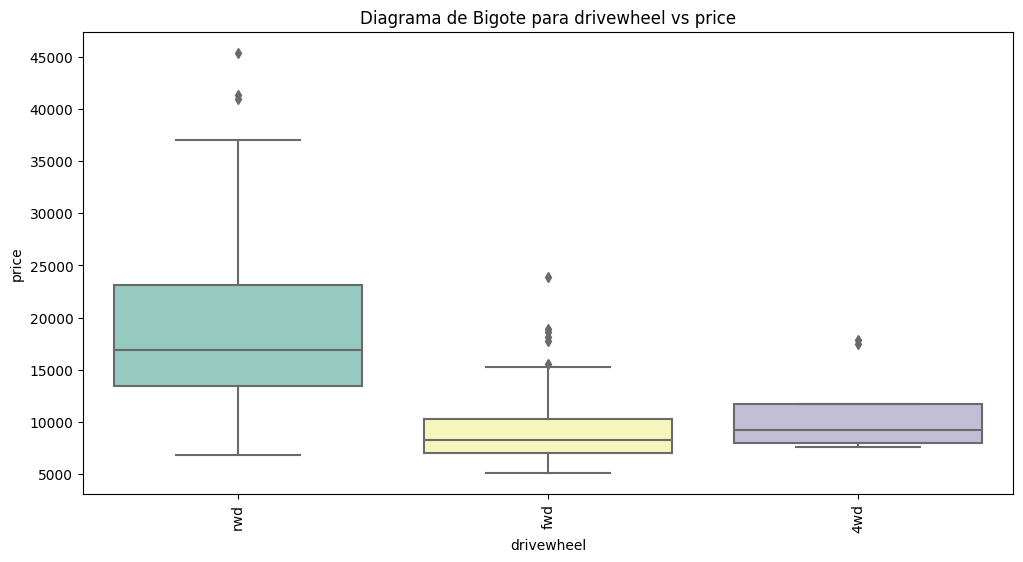

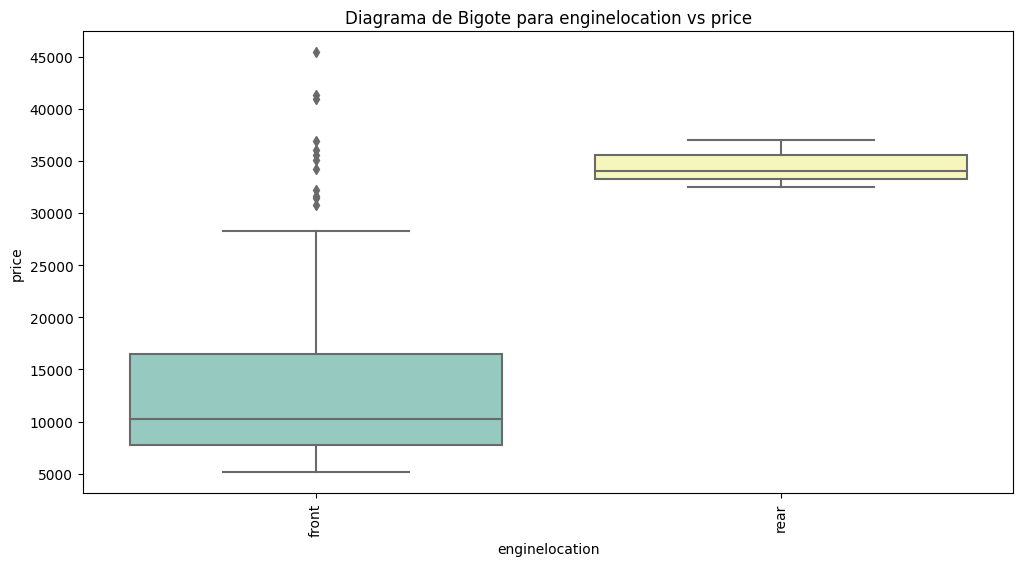

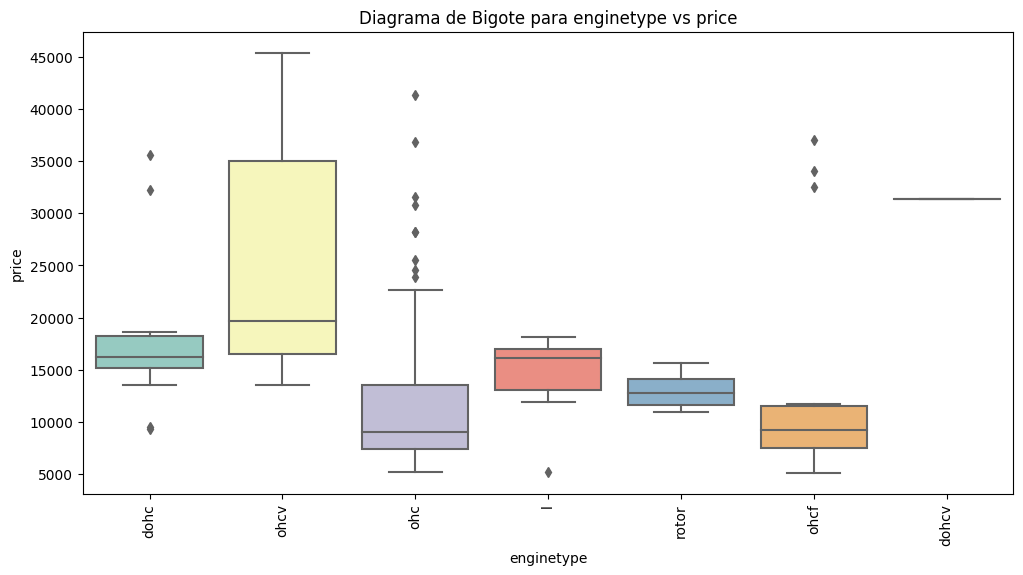

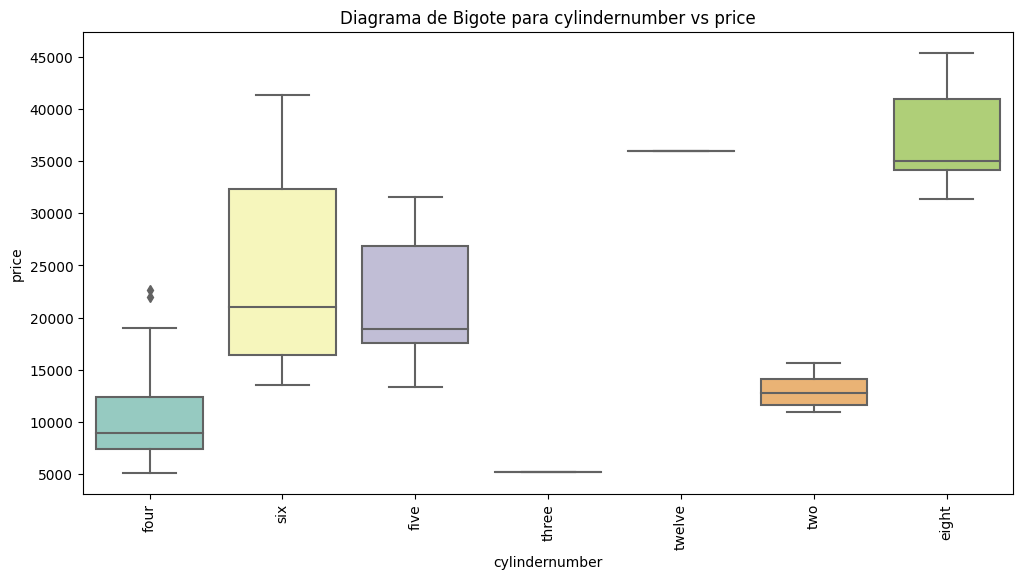

In [ ]:
for columna_categorica in cual_var:
    plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura según tus necesidades
    sb.boxplot(x=columna_categorica, y=data_base['price'], data=data_base, palette="Set3")
    plt.xlabel(columna_categorica)
    plt.ylabel('price')
    plt.title(f'Diagrama de Bigote para {columna_categorica} vs price')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.show()